In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Disclaimer
print("Disclaimer: This script is for educational purposes only. The author is not responsible for any financial decisions made based on this script. Always conduct your own research or consult with a professional before making any financial decisions.")

ticker = 'AAPL'
stock_data = yf.download(ticker, period="6y").sort_index()

# Handle MultiIndex columns if present
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)


# Calculate moving averages
stock_data['50_SMA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_SMA'] = stock_data['Close'].rolling(window=200).mean()

stock_data['50_EMA'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
stock_data['200_EMA'] = stock_data['Close'].ewm(span=200, adjust=False).mean()

# Calculate Bollinger Bands
stock_data['Middle_Band'] = stock_data['Close'].rolling(window=20).mean()
stock_data['Rolling_STD'] = stock_data['Close'].rolling(window=20).std()
stock_data['Upper_Band'] = stock_data['Middle_Band'] + 2 * stock_data['Rolling_STD']
stock_data['Lower_Band'] = stock_data['Middle_Band'] - 2 * stock_data['Rolling_STD']

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data)

# Calculate MACD and Signal Line
stock_data['MACD'] = stock_data['Close'].ewm(span=12, adjust=False).mean() - stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()
stock_data.tail(10)

Disclaimer: This script is for educational purposes only. The author is not responsible for any financial decisions made based on this script. Always conduct your own research or consult with a professional before making any financial decisions.
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,50_SMA,200_SMA,50_EMA,200_EMA,Middle_Band,Rolling_STD,Upper_Band,Lower_Band,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,,,,
2025-02-20,245.830002,246.779999,244.289993,244.940002,32316900,240.413856,223.595717,236.868473,223.126918,234.851250,7.184685,249.220621,220.481880,60.699232,1.927654,-0.118201
2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400,240.473390,223.910876,237.208925,223.350034,235.958032,7.033514,250.025060,221.891004,62.766179,2.288446,0.363129
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,240.485810,224.242096,237.596810,223.586352,237.186266,6.703257,250.592780,223.779753,80.231290,2.668686,0.824240
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,240.476652,224.569582,237.967131,223.819721,238.057889,6.798621,251.655131,224.460646,76.585168,2.931394,1.245671
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600,240.359467,224.861976,238.060969,223.984301,238.175973,6.818014,251.812001,224.539944,62.116289,2.570937,1.510724
2025-02-27,237.300003,242.460007,237.059998,239.410004,41153600,240.151713,225.129963,238.031128,224.116796,238.086117,6.817078,251.720272,224.451962,56.035173,2.015127,1.611605
2025-02-28,241.839996,242.089996,230.199997,236.949997,56833400,240.031363,225.426979,238.180495,224.293146,238.311664,6.865165,252.041995,224.581333,70.728196,1.918863,1.673056
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000,239.776678,225.688849,238.174593,224.429831,238.426123,6.839081,252.104284,224.747962,63.508591,1.517644,1.641974
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100,239.431245,225.934488,238.086570,224.544261,238.834644,6.398212,251.631068,226.038219,54.655409,1.018482,1.517275


In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with shared x-axis
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    vertical_spacing=0.09,
                    subplot_titles=("AAPL Stock Price & Indicators",
                                    "AAPL RSI",
                                    "AAPL MACD and Signal Line",
                                    "AAPL Trading Volume"))

# ---- Plot Closing Prices, Moving Averages & EMA ----
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines',
                         name='Close Price', line=dict(color='#1f77b4')), row=1, col=1)

# Moving Averages (MA)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['50_SMA'], mode='lines',
                         name='50-Day SMA', line=dict(color='#9467bd')), row=1, col=1)

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['200_SMA'], mode='lines',
                         name='200-Day SMA', line=dict(color='#2ca02c')), row=1, col=1)

# Exponential Moving Averages (EMA)

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['50_EMA'], mode='lines',
                         name='50-Day EMA', line=dict(color='#ff7f0e', dash='dot')), row=1, col=1)

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['200_EMA'], mode='lines',
                         name='200-Day EMA', line=dict(color='#17becf', dash='dot')), row=1, col=1)



# ---- Plot RSI ----
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI', line=dict(color='#9467bd')), row=2, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="#d62728", row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="#2ca02c", row=2, col=1)

# ---- Plot MACD and Signal Line ----
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', line=dict(color='#000000')), row=3, col=1)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Signal_Line'], mode='lines', name='Signal Line', line=dict(color='#d62728')), row=3, col=1)

# ---- Plot Volume ----
fig.add_trace(go.Bar(
    x=stock_data.index,
    y=stock_data['Volume'],
    name='Volume',
    marker=dict(color='#1f77b4', opacity=0.9)
), row=4, col=1)

# ---- Layout Customization ----
fig.update_layout(
    height=1500, width=1200, title_text="NVDA Stock Market Analysis (Interactive)",
    showlegend=True,
    xaxis_rangeslider_visible=False,
    plot_bgcolor='white',
    font=dict(color='black'),
    hovermode="x unified"
)

# ---- Show the figure ----
fig.show()


# Stock forcasting using LSTM

<Axes: xlabel='Date'>

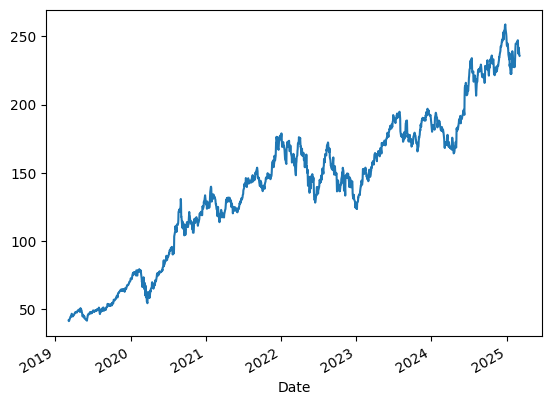

In [3]:
stock_data.Close.plot()

In [4]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

features = ['Close']
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(stock_data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=stock_data.index)
feature_transform.head()

,Close
Date,
2019-03-06,0.002226
2019-03-07,0.000000
2019-03-08,0.000452
2019-03-11,0.007051
2019-03-12,0.009266


In [5]:
#Splitting to Training set and Test set
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

train_index = int(len(feature_transform) * train_ratio)
val_index = train_index + int(len(feature_transform) * val_ratio)


X_train, X_val, X_test = feature_transform[:train_index], feature_transform[train_index:val_index], feature_transform[val_index:]

print(X_train.shape, X_val.shape, X_test.shape)


(905, 1) (301, 1) (303, 1)


In [6]:
import numpy as np

def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(30, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1

    return np.array(sequences), np.array(labels)

# Example usage
train_seq, train_label = create_sequence(X_train)
val_seq, val_label = create_sequence(X_val)
test_seq, test_label = create_sequence(X_test)

print(train_seq.shape, val_seq.shape, test_seq.shape)

(875, 30, 1) (271, 30, 1) (273, 30, 1)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(30, 1), activation='relu'))
lstm.add(Dense(1))

# Compile the model
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Show model summary
lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
print(train_seq.shape, train_label.shape)
print(val_seq.shape, val_label.shape)
print(test_seq.shape, test_label.shape)

(875, 30, 1) (875, 1)
(271, 30, 1) (271, 1)
(273, 30, 1) (273, 1)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-4, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)

history = lstm.fit(train_seq, train_label,
                   epochs=100,
                   validation_data=(val_seq, val_label),
                   verbose=1,
                   callbacks=[early_stopping, reduce_lr])

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0845 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0027 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.0309e-04 - val_loss: 8.7880e-04 - learning_rate: 0.0010
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4501e-04 - val_loss: 5.2685e-04 - learning_rate: 0.0010
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.2001e-04 - val_loss: 4.9910e-04 - learning_rate: 0.0010
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8895e-04 - val_loss: 5.8210e-04 - learning_rate: 0.0010
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0299e-04 - val_loss: 4.9089e-04 - learning_rate: 0.0010
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.7701e-04 - val_loss: 4.1862e-04 - learning_rate: 0.0010
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.7572e-04 -

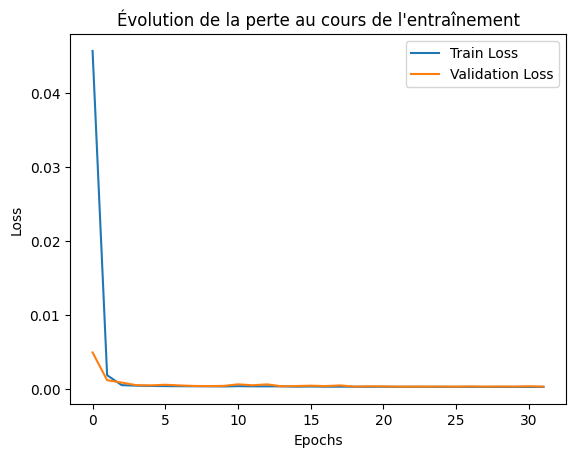

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Évolution de la perte au cours de l\'entraînement')
plt.show()

Comme le modèle atteint un plateau après à peu prés 3 epoch, on pourra gagner de temps en entrainant que sur 10 ou 15 epochs au max.

In [11]:
test_predicted = lstm.predict(test_seq)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [12]:
test_predicted.shape

(273, 1)

In [13]:
from sklearn.metrics import r2_score

test_predicted = lstm.predict(test_seq)

inv_pred = scaler.inverse_transform(test_predicted)
inv_actual = scaler.inverse_transform(test_label)

r2 = r2_score(inv_actual, inv_pred)
print(f"R²: {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
R²: 0.9457


In [14]:
index_stop = stock_data.shape[0] - test_label.shape[0]
stock_data[:index_stop].Close

,Close
Date,
2019-03-06,41.805157
2019-03-07,41.321278
2019-03-08,41.419498
2019-03-11,42.854355
2019-03-12,43.335846
...,...
2024-01-25,193.011185
2024-01-26,191.271622
2024-01-29,190.585739


In [20]:
stock_data.index[index_stop:].shape, inv_pred.shape

((273,), (273, 1))

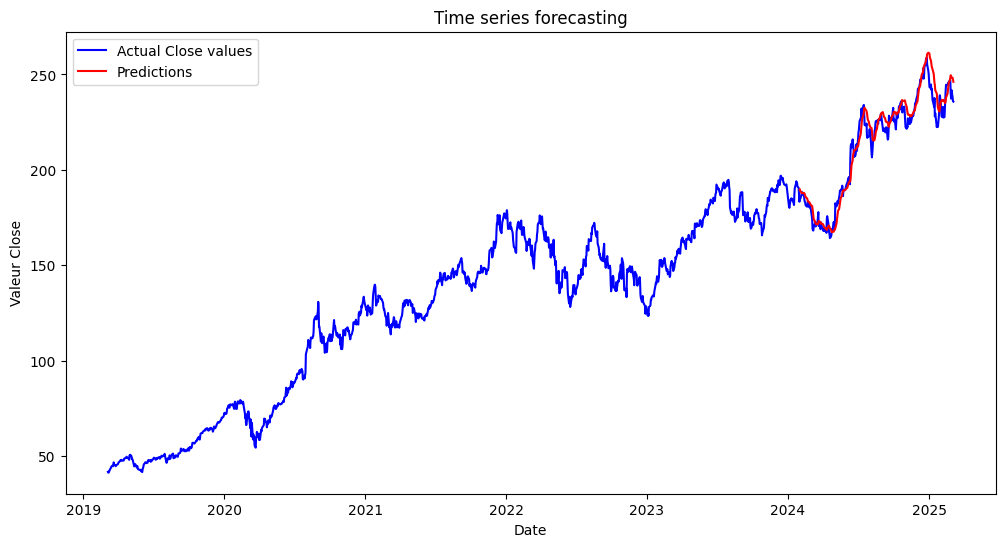

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_data.index, stock_data["Close"], label="Actual Close values", color='blue')


plt.plot(stock_data.index[index_stop:], inv_pred, label="Predictions", color='red')

plt.xlabel("Date")
plt.ylabel("Valeur Close")
plt.title("Time series forecasting")
plt.legend()

plt.show()
